In [1]:
import numpy as np
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt

In [2]:
notes = []
for i in range(5, 7):
    for note in ['C', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#', 'A', 'A#', 'B']:
        notes.append(f'{note}{i}')

mapping = {i: notes[i] for i in range(len(notes))}

In [3]:
a = np.load('river_data.npz', allow_pickle=True)

b = a['arr_0']
b = b.sum(axis=0)

In [4]:
X, y = b['X'], b['y']

In [5]:
svd = TruncatedSVD(n_components=2)
X_transformed = svd.fit_transform(X)

In [6]:
print(svd.explained_variance_ratio_)

[0.63363885 0.1131593 ]


In [7]:
print(svd.singular_values_)

[98126.57256621  2242.86229118]


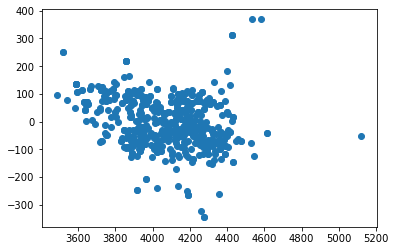

In [8]:
plt.scatter(X_transformed[:, 0], X_transformed[:, 1])

<BarContainer object of 24 artists>

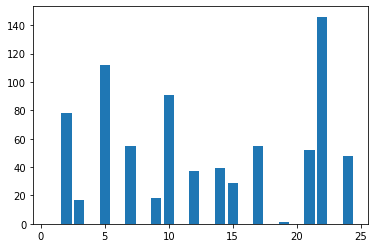

In [9]:
notes_frequency = y.sum(axis=0)
plt.bar(range(1, len(notes_frequency)+1), notes_frequency)

In [10]:
#mapping
for i in range(len(notes)):
    print(f'{i} -> {mapping[i]}')

0 -> C5
1 -> C#5
2 -> D5
3 -> D#5
4 -> E5
5 -> F5
6 -> F#5
7 -> G5
8 -> G#5
9 -> A5
10 -> A#5
11 -> B5
12 -> C6
13 -> C#6
14 -> D6
15 -> D#6
16 -> E6
17 -> F6
18 -> F#6
19 -> G6
20 -> G#6
21 -> A6
22 -> A#6
23 -> B6


In [11]:
def note_played_scatter(X, note_no, y):
    targets = y[:, note_no]
    colors = ['blue' if t == 1.0 else 'red' for t in targets ]
    plt.scatter(X[:, 0], X[:, 1], c=colors)
    plt.title(f'note {mapping[note_no]} played (blue)')
    plt.show()
    

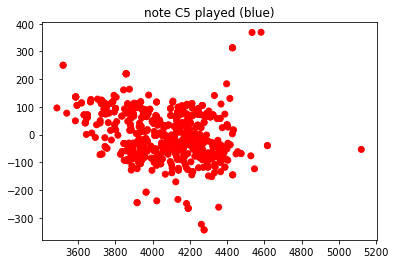

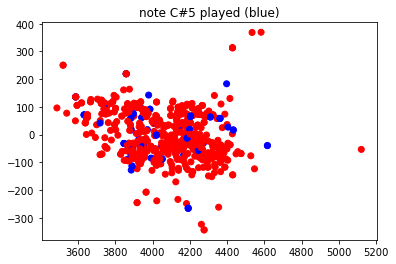

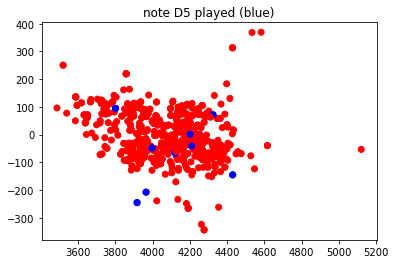

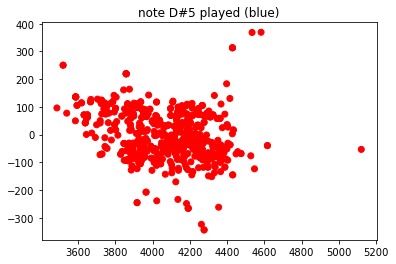

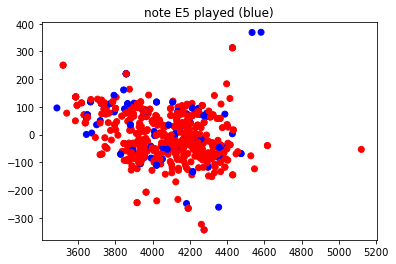

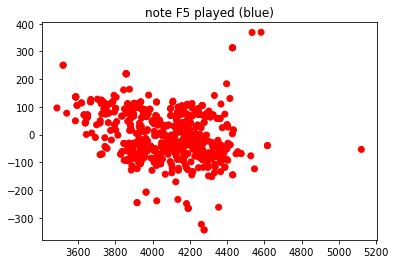

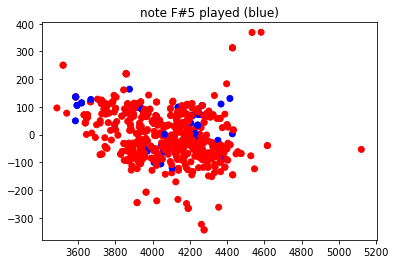

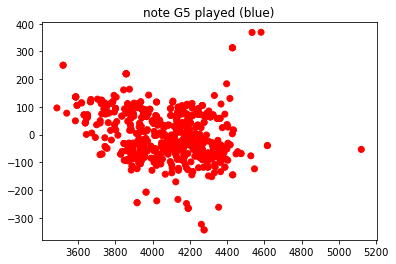

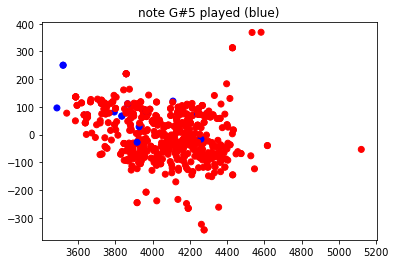

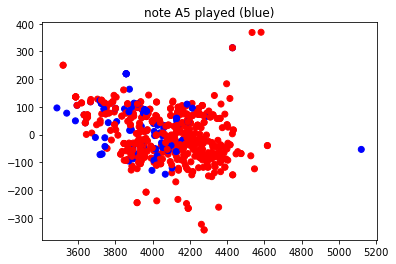

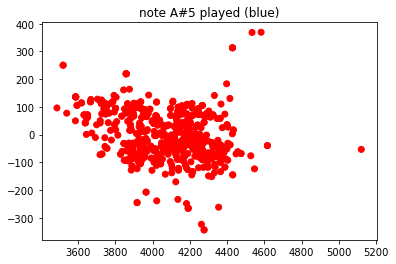

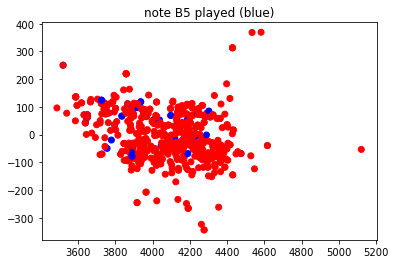

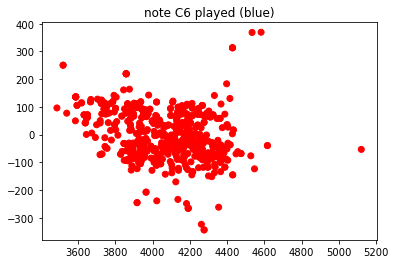

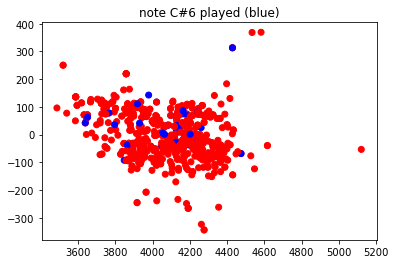

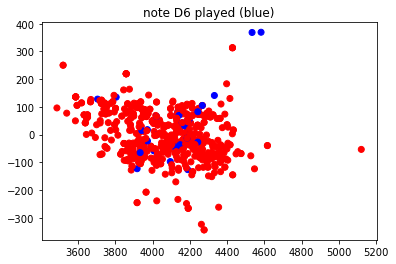

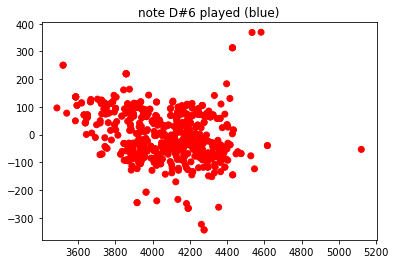

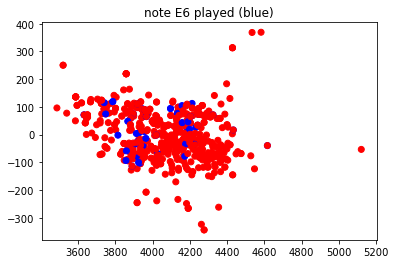

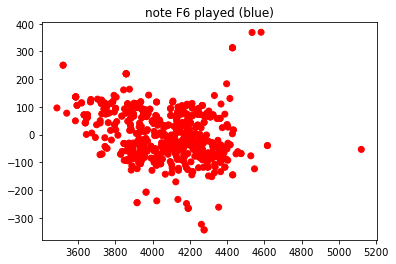

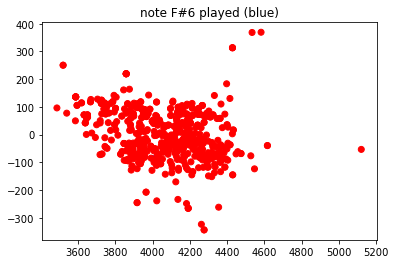

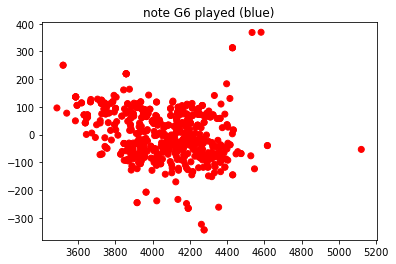

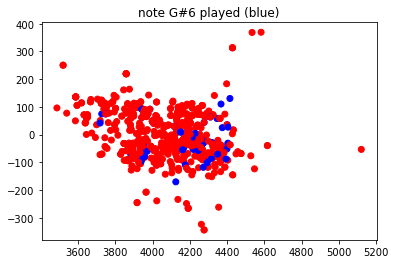

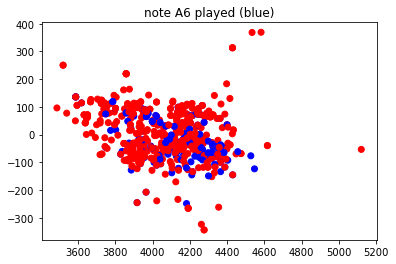

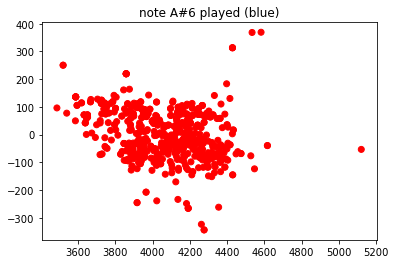

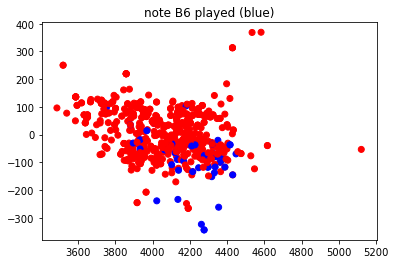

In [12]:
for i in range(len(notes)):
    note_played_scatter(X_transformed, i, y)

In [53]:
y[:, 22].shape

(582,)